# In the first step, we use Pandas to load the data and check for any duplicated and null values in the dataset. 


In [1]:
import sqlite3
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler

df = pd.read_csv('Churn_Modelling.csv')
nl=df.isnull().values.any()
if nl==False :
    print("There is no null  data")
else :
    print("There is   null data in csv ") 

There is no null  data


In [2]:
dup = df.duplicated()
if not dup.any():
    print("There is no duplicated data")
else:
    print("There are duplicated rows in the CSV")
    duplicated_rows = df[dup]
    print(duplicated_rows)


There is no duplicated data


# We check if there are any '?' characters in the rows, indicating missing values. 


In [3]:
nan_rows = df.isin(['?']).any(axis=1).sum()
print(f'Total rows with "?" values: {nan_rows}')


Total rows with "?" values: 0


# Next, we assess the memory usage of the data and aim to reduce overusage by optimizing the data types of each column.


In [4]:
df.info()
pd.options.display.float_format = '{:.2f}'.format
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,5000.50,15690940.57,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.20
std,2886.90,71936.19,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.40
min,1.00,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,2500.75,15628528.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.00
50%,5000.50,15690738.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.91,0.00
75%,7500.25,15753233.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.00
max,10000.00,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.00


In [5]:
df['RowNumber'] = df['RowNumber'].astype(np.int16)
df['CustomerId'] = df['CustomerId'].astype(np.int32)
df['Age'] = df['Age'].astype(np.int8)
df['Tenure'] = df['Tenure'].astype(np.int8)
df['Balance'] = df['Balance'].astype(np.float32)
df['NumOfProducts'] = df['NumOfProducts'].astype(np.int8)
df['HasCrCard'] = df['HasCrCard'].astype(np.int8)
df['IsActiveMember'] = df['IsActiveMember'].astype(np.int8)
df['EstimatedSalary'] = df['EstimatedSalary'].astype(np.float32)
df['Exited'] = df['Exited'].astype(np.int8)




df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int16  
 1   CustomerId       10000 non-null  int32  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int8   
 7   Tenure           10000 non-null  int8   
 8   Balance          10000 non-null  float32
 9   NumOfProducts    10000 non-null  int8   
 10  HasCrCard        10000 non-null  int8   
 11  IsActiveMember   10000 non-null  int8   
 12  EstimatedSalary  10000 non-null  float32
 13  Exited           10000 non-null  int8   
dtypes: float32(2), int16(1), int32(1), int64(1), int8(6), object(3)
memory usage: 507.9+ KB


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,5000.50,15690940.57,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.23,0.20
std,2886.90,71936.19,96.65,10.49,2.89,62398.95,0.58,0.46,0.50,57510.47,0.40
min,1.00,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,2500.75,15628528.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.00
50%,5000.50,15690738.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.91,0.00
75%,7500.25,15753233.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.00
max,10000.00,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.00


# After adjustments, memory usage is almost halved compared to the original dataset. 


# The next part involves normalizing and visualizing the data. 
# We use a heatmap to illustrate the relationships between columns, providing a better understanding of the dataset. 


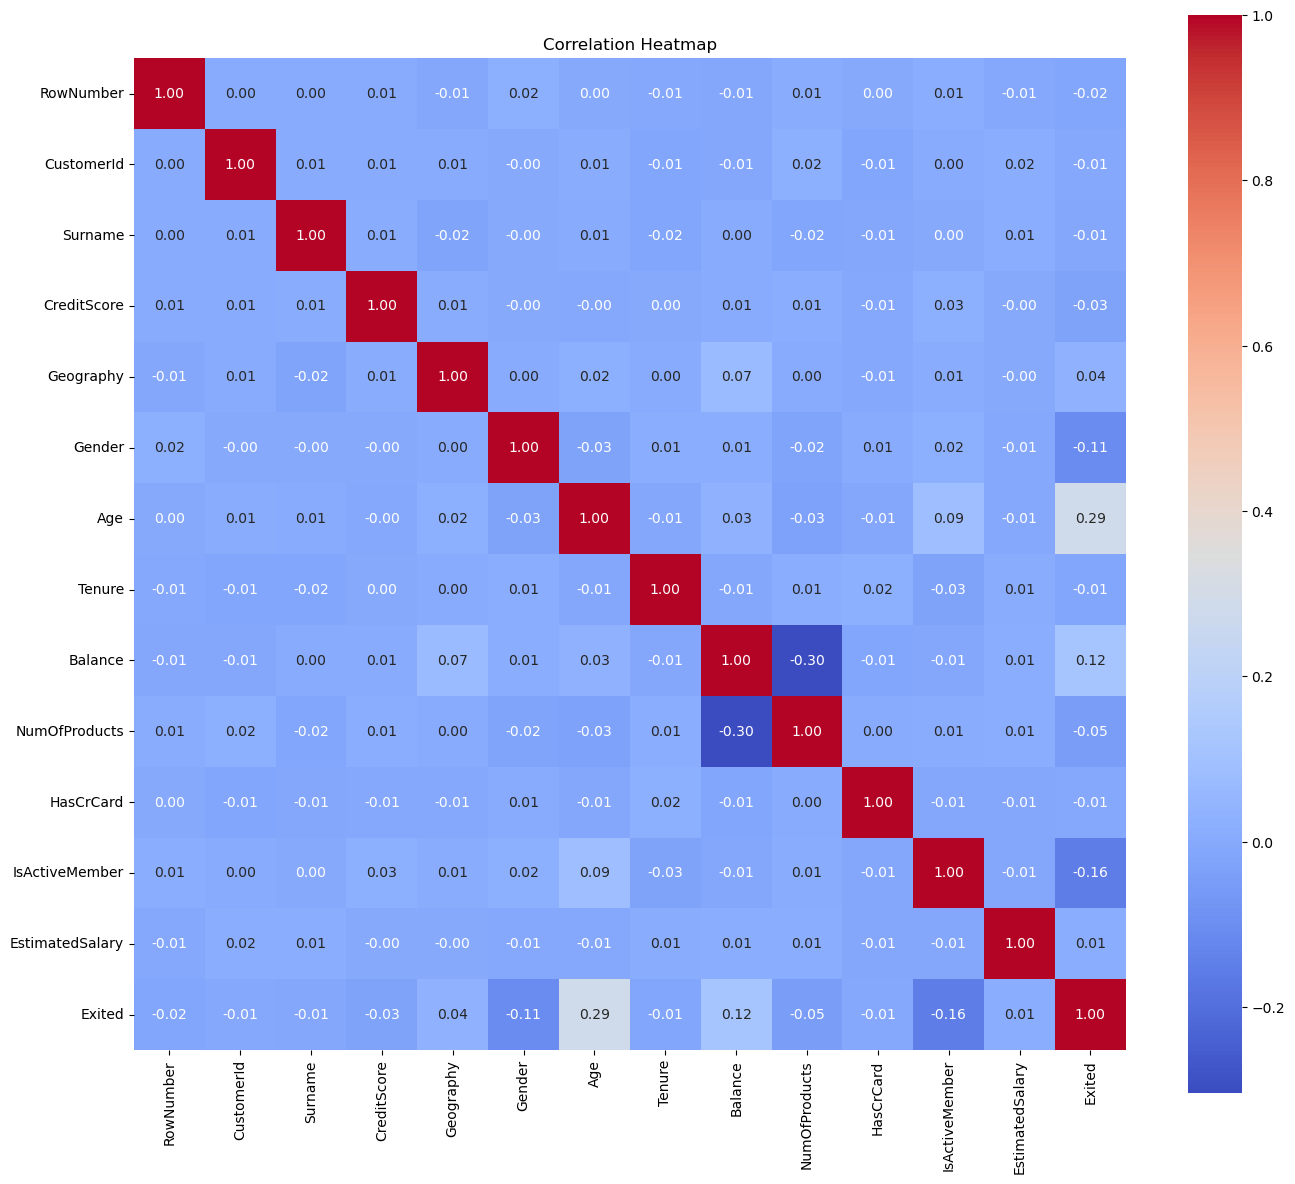

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
correlation_matrix = df.corr()
plt.figure(figsize=(16, 14))  
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()


# We then check if the data requires standardization. 


In [8]:
def calculate_cv_for_each_column(df):
    cv_dict = {}
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):  
            mean = df[col].mean()
            std = df[col].std()
            cv = (std / mean) * 100
            cv_dict[col] = cv
    return cv_dict  
cv_per_column = calculate_cv_for_each_column(df)
print(cv_per_column)


{'RowNumber': 57.73214038410494, 'CustomerId': 0.45845681337316774, 'Surname': 56.12274776539292, 'CreditScore': 14.857650996563196, 'Geography': 110.88427295656393, 'Gender': 91.24647739023834, 'Age': 26.945841280990624, 'Tenure': 57.695786327994, 'Balance': 81.58230572346166, 'NumOfProducts': 38.01165586191286, 'HasCrCard': 64.61239751596504, 'IsActiveMember': 97.02910667033953, 'EstimatedSalary': 57.45862132216632, 'Exited': 197.72635444028518}


# Deploying normaliztion 

# Since our primary goal is to deploy machine learning processes, we apply standardization to the dataset. 


In [9]:
standard_scr = StandardScaler()
df_standardized = pd.DataFrame(standard_scr.fit_transform(df.select_dtypes(exclude=['object'])),
                                columns=df.select_dtypes(exclude=['object']).columns)
print(df_standardized)


      RowNumber  CustomerId  Surname  CreditScore  Geography  Gender   Age  \
0         -1.73       -0.78    -0.46        -0.33      -0.90   -1.10  0.29   
1         -1.73       -0.61    -0.39        -0.44       1.52   -1.10  0.20   
2         -1.73       -1.00     0.63        -1.54      -0.90   -1.10  0.29   
3         -1.73        0.14    -1.44         0.50      -0.90   -1.10  0.01   
4         -1.73        0.65     0.37         2.06       1.52   -1.10  0.39   
...         ...         ...      ...          ...        ...     ...   ...   
9995       1.73       -1.18     0.58         1.25      -0.90    0.91  0.01   
9996       1.73       -1.68    -0.20        -1.39      -0.90    0.91 -0.37   
9997       1.73       -1.48     0.07         0.60      -0.90   -1.10 -0.28   
9998       1.73       -0.12     0.99         1.26       0.31    0.91  0.29   
9999       1.73       -0.87     1.47         1.46      -0.90   -1.10 -1.04   

      Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember

# The next step is to implement various machine learning algorithms and evaluate their performance to identify the most effective ones. 


# Using the K-Nearest Neighbors (KNN) method, we achieve an impressive accuracy of 100% through cross-validation, enhancing the model's reliability. 


In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

y = df['Exited']
X = df.drop(columns=['Exited'])

label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

k_values = range(1, 31)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

optimal_k = k_values[cv_scores.index(max(cv_scores))]
print(f"Optimal K: {optimal_k}")

knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)

accuracy = knn_optimal.score(X_test, y_test)
print(f"Test Accuracy with Optimal K: {accuracy:.2f}")


Optimal K: 17
Test Accuracy with Optimal K: 0.84


# The next method, Decision Tree, is also evaluated, with accuracy improved through the use of AdaBoost for better performance. 


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

y = df['Exited']
X = df.drop(columns=['Exited'])

label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

base_estimator = DecisionTreeClassifier(max_depth=1)

adaboost = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

adaboost.fit(X_train, y_train)

y_pred = adaboost.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


E:\Anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.86


# Lastly, we apply the Gradient Boosting method. 


In [28]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

y = df['Exited']
X = df.drop(columns=['Exited'])

label_encoders = {}
le_target = LabelEncoder() 
y = le_target.fit_transform(y) 
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'multi:softmax',
    'num_class': 4,
    'max_depth': 4,
    'eta': 0.2,
    'subsample': 0.8,
    'colsample_bytree': 0.9,
    'eval_metric': 'mlogloss',
    'seed': 50
}

num_round = 100
bst = xgb.train(params, dtrain, num_round)

y_pred = bst.predict(dtest)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.87


# In conclusion, Gradient Boosting emerges as the most efficient machine learning model for this dataset, achieving an accuracy of 87%. 


# The next phase involves enhancing our prediction accuracy with a neural network. 


In [75]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split

# Assume 'df' is already loaded and contains the data
y = df['Exited']
X = df.drop(columns=['Exited'])

# Label encode categorical columns
label_encoders = {}
le_target = LabelEncoder()
y = le_target.fit_transform(y)

for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling using RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the input shape
input_shape = X_train.shape[1]

# Define the model
def create_model(input_shape):
    model = models.Sequential([
        layers.Dense(256, activation='relu', input_shape=(input_shape,), name='hidden_layer_1'),
        layers.BatchNormalization(name='batch_norm_layer_1'),
        layers.Dropout(0.3, name='drop_out_layer_1'),

        layers.Dense(128, activation='relu', name='hidden_layer_2'),
        layers.BatchNormalization(name='batch_norm_layer_2'),
        layers.Dropout(0.3, name='drop_out_layer_2'),

        layers.Dense(64, activation='relu', name='hidden_layer_3'),
        layers.BatchNormalization(name='batch_norm_layer_3'),
        layers.Dropout(0.3, name='drop_out_layer_3'),

        layers.Dense(1, activation='sigmoid', name='output_layer')
    ])
    return model

# Create the model
model = create_model(input_shape)

# Compile the model
model.compile(optimizer='RMSProp',
              loss='binary_crossentropy',  
              metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}\n")


C:\Users\LapTopCity\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 256)            │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_layer_1              │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_out_layer_1 (Dropout)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_layer_2              │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_out_layer_2 (Dropout)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_layer_3              │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_out_layer_3 (Dropout)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,593 (182.00 KB)

 Trainable params: 45,697 (178.50 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5973 - loss: 0.7373 - val_accuracy: 0.7971 - val_loss: 0.5522
Epoch 2/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7288 - loss: 0.5687 - val_accuracy: 0.7979 - val_loss: 0.4786
Epoch 3/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7691 - loss: 0.4953 - val_accuracy: 0.8000 - val_loss: 0.4515
Epoch 4/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8210 - loss: 0.4266 - val_accuracy: 0.8007 - val_loss: 0.4481
Epoch 5/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8323 - loss: 0.4007 - val_accuracy: 0.8036 - val_loss: 0.4501
Epoch 6/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8377 - loss: 0.3981 - val_accuracy: 0.8129 - val_loss: 0.4213
Epoch 7/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8298 - loss: 0.4062 - val_accuracy: 0.8264 - val_loss: 0.4055
Epoch 8/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - loss: 0.3686 - val_accuracy: 0.8379 - val_loss:

# We test various configurations, including different numbers of layers, neurons, and parameters such as the number of epochs, batch sizes, and activation functions. 
# The highest test accuracy achieved with the neural network is 86.43%, reinforcing that Gradient Boosting remains the best method for this dataset, with an accuracy of 87%.